In [2]:
pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-ed5u5f69
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-ed5u5f69
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.4 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369398 sha256=ab34806977127e0530d87b7f0c3ff6e4e9a7f466fee26993751f589378a7d0ae
  Stored in directory: /tmp/pip-ephem-wheel-cache-rpe81ntv/wheels/c8/e4/e1/11374c111387672fc2068dfbe0d4b424cb9cdd1b2e184a71b5
Successfully built clip


In [1]:
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
model, preprocess = clip.load("ViT-B/32", device=device)

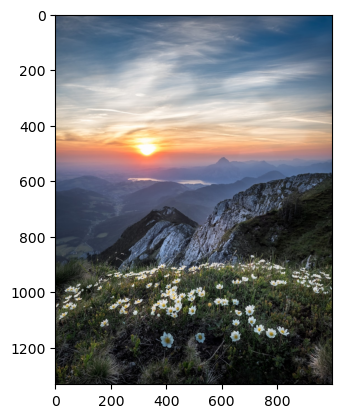

In [4]:
image = preprocess(Image.open("./morning.jpg")).unsqueeze(0).to(device)
plt.imshow(Image.open('./morning.jpg'))
plt.show()

In [22]:
text = clip.tokenize(["a dog", "a photo"]).to(device)

In [23]:
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs) 

Label probs: [[0.01413208 0.9858679 ]]
